In [ ]:
import os

# Clone the repository
!git clone https://github.com/ahmed123234/olive-leaf-dataset.git

# Verify if the 'dataset' directory exists within the cloned repository
repo_path = 'olive-leaf-dataset'
dataset_path = os.path.join(repo_path, 'dataset')

if os.path.exists(dataset_path):
    print(f"Successfully cloned the repository and found the dataset directory at: {dataset_path}")
    # List contents to confirm download
    print("Contents of the dataset directory:")
    print(os.listdir(dataset_path))
else:
    print(f"Error: The dataset directory was not found at {dataset_path}. Please check the repository structure.")

Cloning into 'olive-leaf-dataset'...
remote: Enumerating objects: 3320, done.
remote: Total 3320 (delta 0), reused 0 (delta 0), pack-reused 3320 (from 2)
Receiving objects: 100% (3320/3320), 185.14 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Updating files: 100% (3401/3401), done.
Successfully cloned the repository and found the dataset directory at: olive-leaf-dataset/dataset
Contents of the dataset directory:
['test', 'train']


# Task
**Task**: Load all image paths and their corresponding labels from the 'dataset' directory into a Pandas DataFrame. During this process, implement a robust check to identify and report any corrupted or non-image files encountered. Ensure the DataFrame is properly structured with image paths and labels for subsequent analysis.

## Load Data and Check Integrity

### Subtask:
Scan all directories within the 'dataset' folder to gather image paths and their corresponding labels. Create a Pandas DataFrame to store this information. Additionally, check for and report any corrupted or non-image files encountered during the scan.


In [ ]:
import os
import pandas as pd
from PIL import Image

# Define paths for train and test directories
# Assuming repo_path is defined from previous cells
overall_train_dir = os.path.join(repo_path, 'dataset', 'train')
overall_test_dir = os.path.join(repo_path, 'dataset', 'test')

# Define a list of valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Initialize empty lists
image_paths = []
labels = []
corrupted_files = []

# Function to scan directories
def scan_directory(base_dir):
    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            # Assuming class_name is the label
            label = class_name
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                if os.path.isfile(img_path) and img_name.lower().endswith(valid_extensions):
                    try:
                        # Attempt to open the image to check for corruption
                        with Image.open(img_path) as img:
                            img.verify() # Verify integrity
                        image_paths.append(img_path)
                        labels.append(label)
                    except (IOError, SyntaxError, Image.UnidentifiedImageError) as e:
                        print(f"Warning: Corrupted or unreadable image skipped: {img_path} - {e}")
                        corrupted_files.append(img_path)
                else:
                    # If it's not a valid image file, consider it non-image/corrupted for this task
                    # Or you can filter specifically for non-image files if needed
                    corrupted_files.append(img_path)

# Scan training and testing directories
print(f"Scanning training directory: {overall_train_dir}")
scan_directory(overall_train_dir)
print(f"Scanning testing directory: {overall_test_dir}")
scan_directory(overall_test_dir)

# Create a Pandas DataFrame
df_dataset = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Print DataFrame head
print("\nDataFrame head:")
print(df_dataset.head())

# Print total images loaded
print(f"\nTotal images loaded into DataFrame: {len(df_dataset)}")

# Report corrupted/non-image files
if corrupted_files:
    print(f"\nNumber of corrupted/non-image files found: {len(corrupted_files)}")
    print("Corrupted/non-image file paths:")
    for f in corrupted_files:
        print(f)
else:
    print("\nNo corrupted or non-image files found.")

print("Dataset scan complete.")

Scanning training directory: olive-leaf-dataset/dataset/train
Scanning testing directory: olive-leaf-dataset/dataset/test

DataFrame head:
                                          image_path            label
0  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius
1  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius
2  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius
3  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius
4  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius

Total images loaded into DataFrame: 3400

No corrupted or non-image files found.
Dataset scan complete.


## Analyze Class Distribution

### Subtask:
Generate a bar chart visualizing the frequency of each class ('Healthy', 'aculus_olearius', 'olive_peacock_spot') within the dataset. Calculate and display the percentage of images belonging to each class to identify any class imbalances.



Class Percentages:
label
olive_peacock_spot    42.941176
Healthy               30.882353
aculus_olearius       26.176471
Name: count, dtype: float64


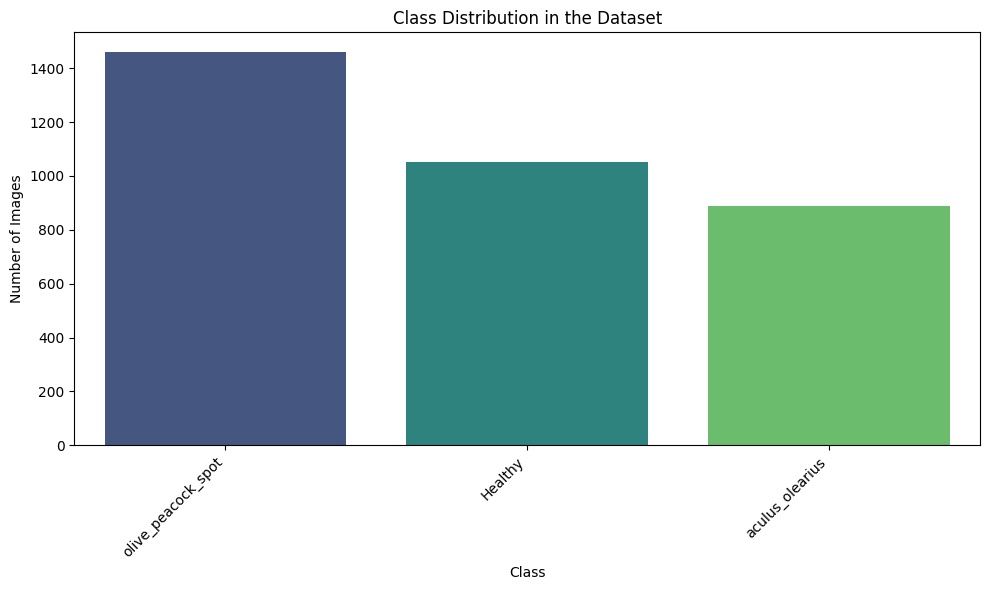

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for the 'label' column
class_counts = df_dataset['label'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')

# Calculate the percentage of images for each class
total_images = len(df_dataset)
class_percentages = (class_counts / total_images) * 100

# Print the class percentages
print("\nClass Percentages:")
print(class_percentages)

# Display the plot
plt.tight_layout()
plt.show()

## Extract Image Property Statistics

### Subtask:
For each image in the dataset, extract properties such as height, width, and calculate the mean and standard deviation of pixel values across the RGB channels. Plot the distributions of image heights and widths. Visualize the distributions of mean pixel values and standard deviations for each RGB channel to understand image characteristics.

Image properties extracted and added to DataFrame.
DataFrame head with new properties:
                                          image_path            label  height  \
0  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius     600   
1  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius     600   
2  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius     600   
3  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius     600   
4  olive-leaf-dataset/dataset/train/aculus_oleari...  aculus_olearius     600   

   width    R_mean    G_mean    B_mean     R_std     G_std     B_std  
0    800  0.771113  0.790460  0.763348  0.182050  0.164667  0.208054  
1    800  0.663758  0.680327  0.658404  0.201123  0.175374  0.219182  
2    800  0.615775  0.616612  0.619467  0.277054  0.267723  0.312146  
3    800  0.774572  0.782015  0.768595  0.193041  0.181202  0.221593  
4    800  0.715687  0.717903  0.740387  0.089125  0.094356  0.134409  


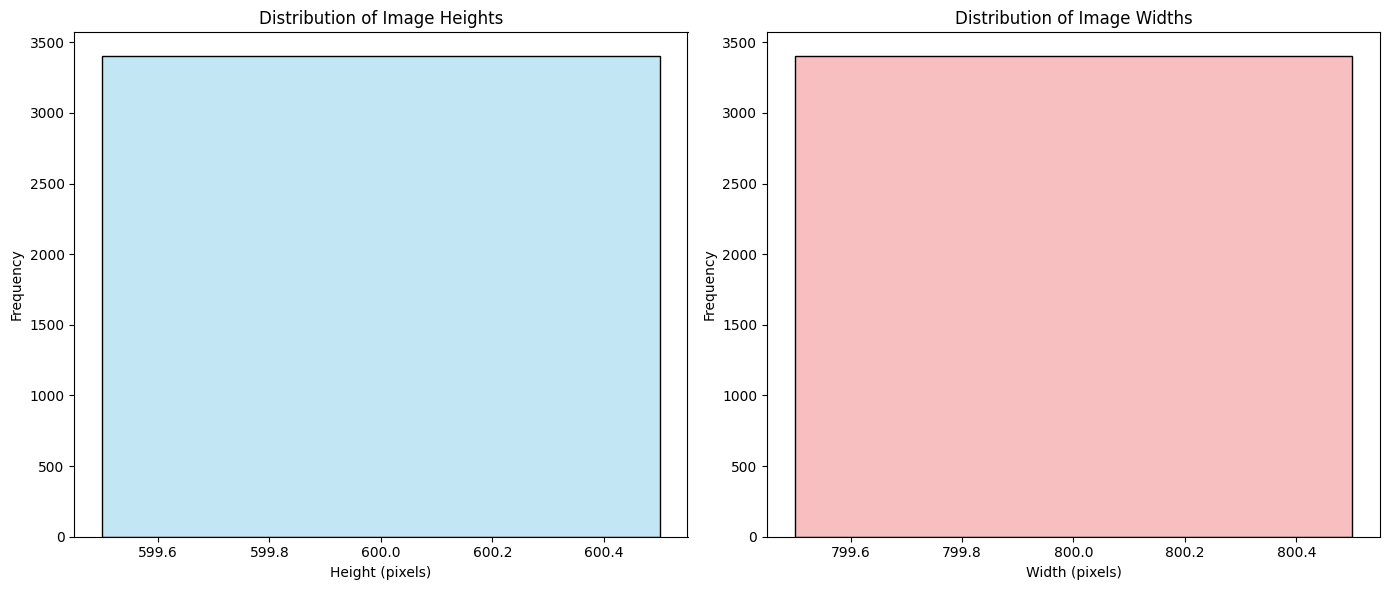

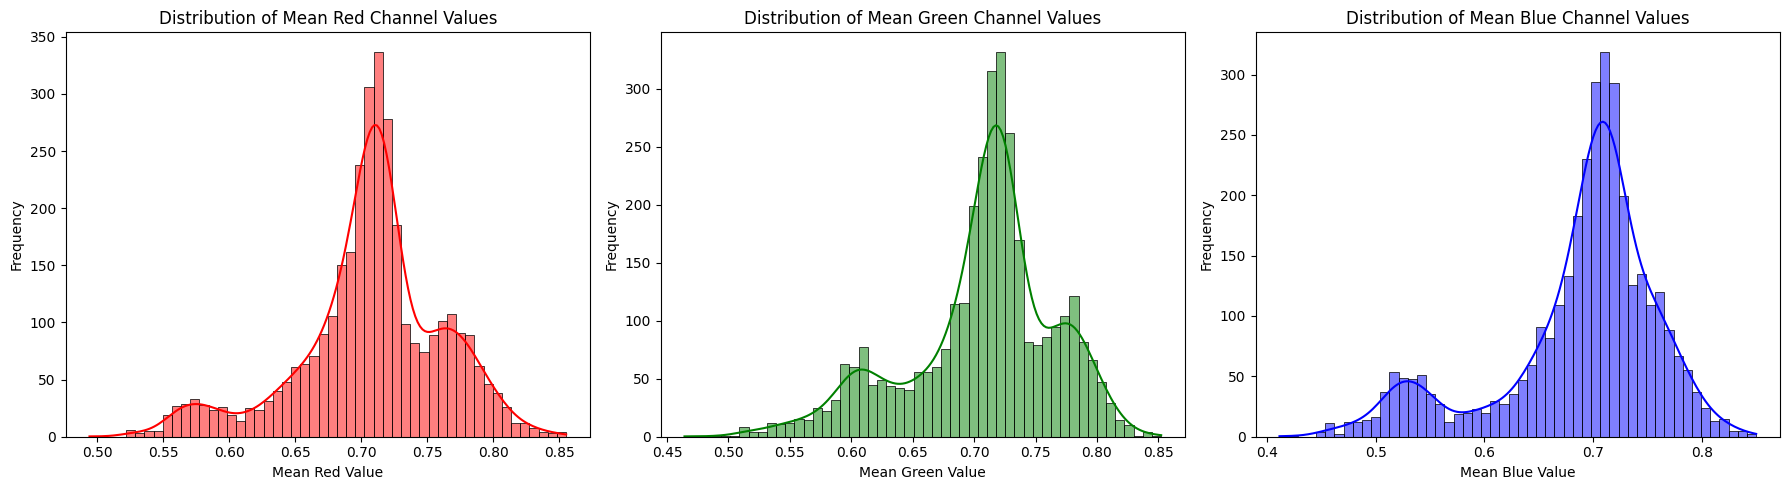

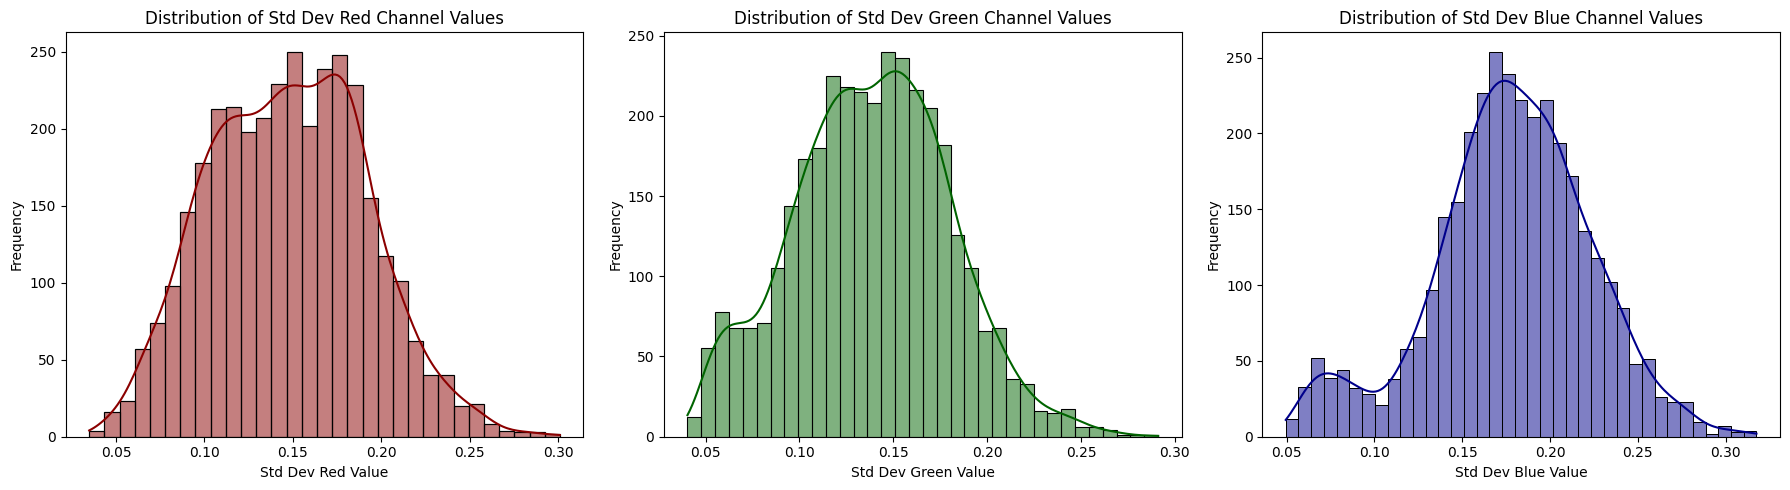

All image property distribution plots generated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# 1. Initialize empty lists to store image properties
image_heights = []
image_widths = []
R_mean = []
G_mean = []
B_mean = []
R_std = []
G_std = []
B_std = []

# 2. Iterate through each row of the df_dataset DataFrame
for index, row in df_dataset.iterrows():
    img_path = row['image_path']

    try:
        # 3. Open the image using PIL.Image.open() and convert it to a NumPy array
        img = Image.open(img_path).convert('RGB')
        img_np = np.array(img)

        # 4. Extract the height and width of the image and append them to their respective lists
        height, width, _ = img_np.shape
        image_heights.append(height)
        image_widths.append(width)

        # 5. Calculate the mean and standard deviation of pixel values for each RGB channel
        # Normalize pixel values to [0, 1] for calculation
        img_normalized = img_np / 255.0

        R_mean.append(img_normalized[:,:,0].mean())
        G_mean.append(img_normalized[:,:,1].mean())
        B_mean.append(img_normalized[:,:,2].mean())

        R_std.append(img_normalized[:,:,0].std())
        G_std.append(img_normalized[:,:,1].std())
        B_std.append(img_normalized[:,:,2].std())

    except Exception as e:
        print(f"Could not process image {img_path}: {e}")
        # Append NaN or skip if an image cannot be processed, to maintain DataFrame length consistency
        image_heights.append(np.nan)
        image_widths.append(np.nan)
        R_mean.append(np.nan)
        G_mean.append(np.nan)
        B_mean.append(np.nan)
        R_std.append(np.nan)
        G_std.append(np.nan)
        B_std.append(np.nan)

# 6. Add these new lists as new columns to the df_dataset DataFrame
df_dataset['height'] = image_heights
df_dataset['width'] = image_widths
df_dataset['R_mean'] = R_mean
df_dataset['G_mean'] = G_mean
df_dataset['B_mean'] = B_mean
df_dataset['R_std'] = R_std
df_dataset['G_std'] = G_std
df_dataset['B_std'] = B_std

# Drop rows where image processing failed (if any NaNs were added)
df_dataset.dropna(subset=['height', 'width'], inplace=True)

print("Image properties extracted and added to DataFrame.")
print("DataFrame head with new properties:")
print(df_dataset.head())

# 7. Create two subplots side-by-side for height and width distributions
plt.figure(figsize=(14, 6))

# 8. Plot a histogram of image heights
plt.subplot(1, 2, 1)
sns.histplot(df_dataset['height'], kde=True, color='skyblue')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

# 9. Plot a histogram of image widths
plt.subplot(1, 2, 2)
sns.histplot(df_dataset['width'], kde=True, color='lightcoral')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# 10. Add appropriate titles and labels to both plots.
plt.tight_layout()
plt.show()

# 11. Create a figure with three subplots for mean pixel values
plt.figure(figsize=(18, 5))

# 12. Plot distributions of mean pixel values for R, G, B channels
plt.subplot(1, 3, 1)
sns.histplot(df_dataset['R_mean'], kde=True, color='red')
plt.title('Distribution of Mean Red Channel Values')
plt.xlabel('Mean Red Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_dataset['G_mean'], kde=True, color='green')
plt.title('Distribution of Mean Green Channel Values')
plt.xlabel('Mean Green Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_dataset['B_mean'], kde=True, color='blue')
plt.title('Distribution of Mean Blue Channel Values')
plt.xlabel('Mean Blue Value')
plt.ylabel('Frequency')

# 13. Add appropriate titles and labels to each subplot.
plt.tight_layout()
plt.show()

# 14. Create another figure with three subplots for standard deviation of pixel values
plt.figure(figsize=(18, 5))

# 15. Plot distributions of standard deviation values for R, G, B channels
plt.subplot(1, 3, 1)
sns.histplot(df_dataset['R_std'], kde=True, color='darkred')
plt.title('Distribution of Std Dev Red Channel Values')
plt.xlabel('Std Dev Red Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_dataset['G_std'], kde=True, color='darkgreen')
plt.title('Distribution of Std Dev Green Channel Values')
plt.xlabel('Std Dev Green Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_dataset['B_std'], kde=True, color='darkblue')
plt.title('Distribution of Std Dev Blue Channel Values')
plt.xlabel('Std Dev Blue Value')
plt.ylabel('Frequency')

# 16. Add appropriate titles and labels to each subplot.
plt.tight_layout()
plt.show()

print("All image property distribution plots generated.")

## Visualize Sample Images and Average Images

### Subtask:
Display a 3x5 grid showing 5 random sample images from each of the three classes ('Healthy', 'aculus_olearius', 'olive_peacock_spot') along with their labels. Additionally, compute and plot the average image for each class to reveal any consistent lighting, color, or positioning biases.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

# 1. Get the unique class names from the 'label' column of the df_dataset DataFrame.
class_names_unique = df_dataset['label'].unique()

print(f"Unique classes found: {class_names_unique}")

Unique classes found: ['aculus_olearius' 'Healthy' 'olive_peacock_spot']


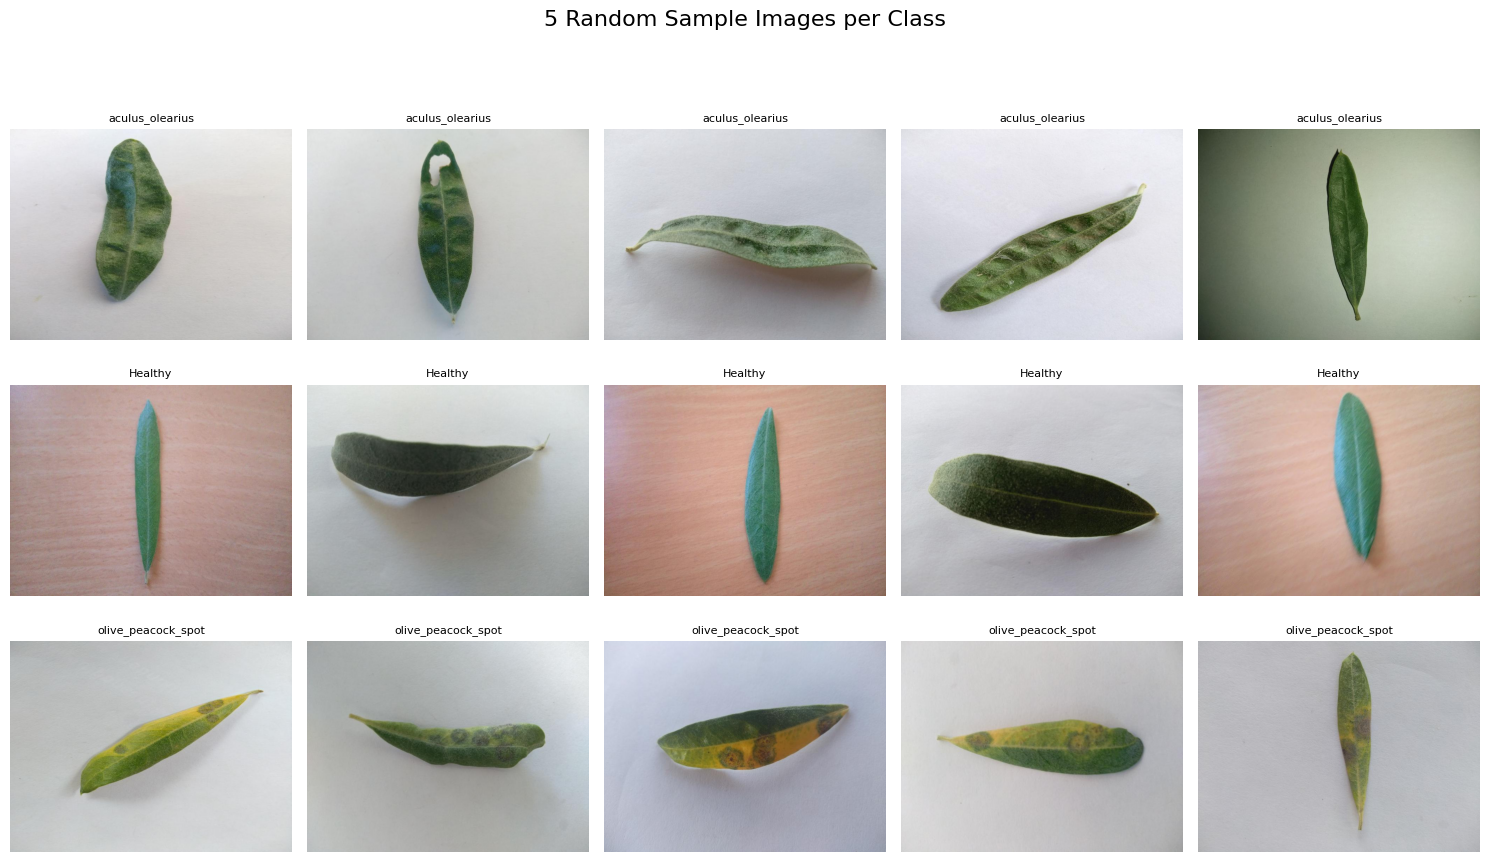

Sample images displayed.
Average images computed.


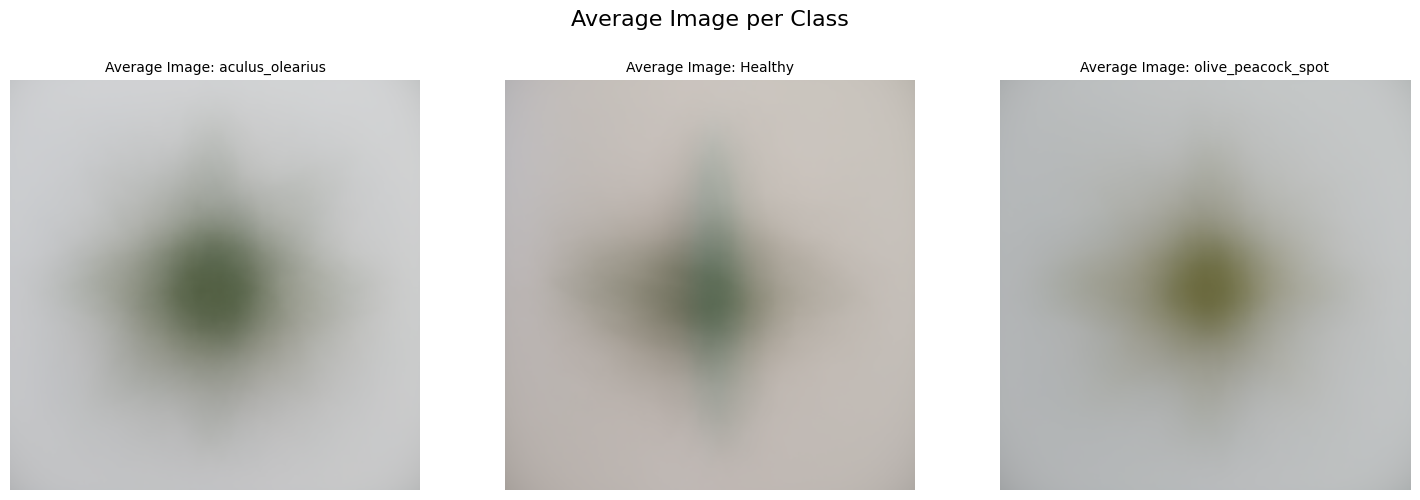

Average images displayed.


In [ ]:
import random

# 2. Create a figure with a 3x5 grid of subplots to display sample images.
plt.figure(figsize=(15, 9))

# 3. For each unique class, randomly select 5 image paths from the df_dataset.
# 4. Iterate through the selected image paths, display, title, and turn off axes.
for i, class_name in enumerate(class_names_unique):
    # Get all image paths for the current class
    class_images = df_dataset[df_dataset['label'] == class_name]['image_path'].tolist()
    # Randomly select 5 images (or fewer if less than 5 available)
    sample_images = random.sample(class_images, min(5, len(class_images)))

    for j, img_path in enumerate(sample_images):
        row_idx = i  # Each class gets a row
        col_idx = j

        plt.subplot(len(class_names_unique), 5, row_idx * 5 + col_idx + 1)
        try:
            img = Image.open(img_path).convert('RGB')
            plt.imshow(img)
            plt.title(f"{class_name}", fontsize=8)
            plt.axis('off')
        except Exception as e:
            print(f"Could not load sample image {img_path}: {e}")
            plt.title("Error Loading Image", fontsize=8)
            plt.axis('off')

# 5. Adjust the layout of the sample image grid and display it.
plt.suptitle('5 Random Sample Images per Class', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to prevent suptitle overlap
plt.show()

print("Sample images displayed.")

# 6. Initialize an empty dictionary to store the average image for each class.
average_images = {}

# Define a consistent size for resizing images for average calculation
# This is crucial for correctly averaging pixel values.
IMG_SIZE = (224, 224)

# 7. For each unique class: compute and store the average image
for class_name in class_names_unique:
    class_images_paths = df_dataset[df_dataset['label'] == class_name]['image_path'].tolist()

    if not class_images_paths:
        print(f"No images found for class: {class_name}")
        continue

    # b. Initialize a numpy array for accumulation
    # Use float type for accumulation to avoid overflow and maintain precision
    accumulator = np.zeros((*IMG_SIZE, 3), dtype=np.float32)
    # c. Initialize a counter
    img_count = 0

    # d. Iterate through each image path for the current class:
    for img_path in class_images_paths:
        try:
            # i. Load the image and convert to 'RGB'
            img = Image.open(img_path).convert('RGB')
            # ii. Resize the image to a consistent size
            img_resized = img.resize(IMG_SIZE)
            # iii. Convert to numpy array and normalize to [0, 1]
            img_np = np.array(img_resized, dtype=np.float32) / 255.0

            # iv. Add to accumulator array
            accumulator += img_np
            # v. Increment counter
            img_count += 1
        except Exception as e:
            print(f"Could not process image {img_path} for averaging: {e}")

    # e. Calculate the average image
    if img_count > 0:
        average_image = accumulator / img_count
        # Ensure pixel values are within [0, 1] after averaging
        average_image = np.clip(average_image, 0, 1)
        # f. Store in dictionary
        average_images[class_name] = average_image
    else:
        print(f"No valid images processed for averaging in class: {class_name}")

print("Average images computed.")

# 8. Create a figure with subplots to display the average images.
plt.figure(figsize=(15, 5))

# 9. For each average image in the dictionary: display, title, and turn off axes.
for i, (class_name, avg_img) in enumerate(average_images.items()):
    plt.subplot(1, len(average_images), i + 1)
    plt.imshow(avg_img)
    plt.title(f'Average Image: {class_name}', fontsize=10)
    plt.axis('off')

# 10. Adjust the layout of the average image grid and display it.
plt.suptitle('Average Image per Class', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("Average images displayed.")

## Advanced Visualizations: Color Histograms and Edge Detection

### Subtask:
Plot color histograms (Red, Green, Blue channels) for a sample of 'Healthy' and 'olive_peacock_spot' images to identify potential color-based discriminators. Apply Canny edge detection to a sample of 'olive_peacock_spot' images to visualize and assess if disease textures are distinct.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Filter df_dataset for 'Healthy' and 'olive_peacock_spot' classes
healthy_images = df_dataset[df_dataset['label'] == 'Healthy']['image_path'].tolist()
olive_peacock_spot_images = df_dataset[df_dataset['label'] == 'olive_peacock_spot']['image_path'].tolist()

print(f"Found {len(healthy_images)} 'Healthy' images and {len(olive_peacock_spot_images)} 'olive_peacock_spot' images.")

Found 1050 'Healthy' images and 1460 'olive_peacock_spot' images.


Generating color histograms for sample 'Healthy' images...


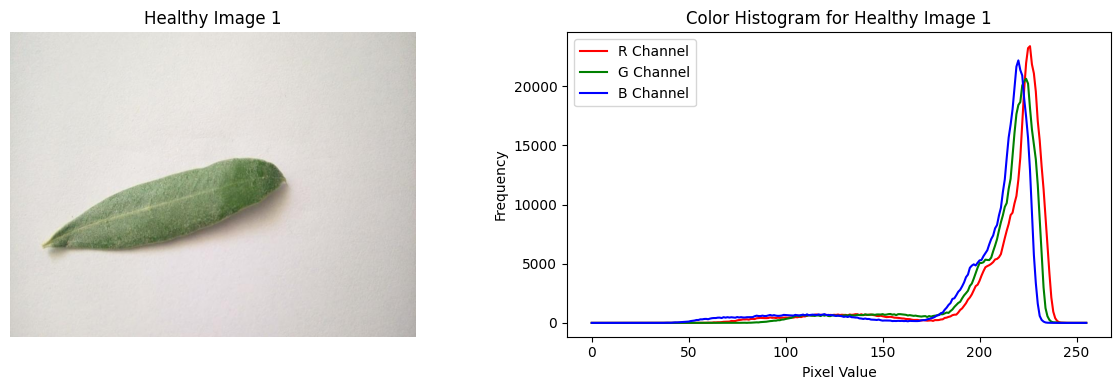

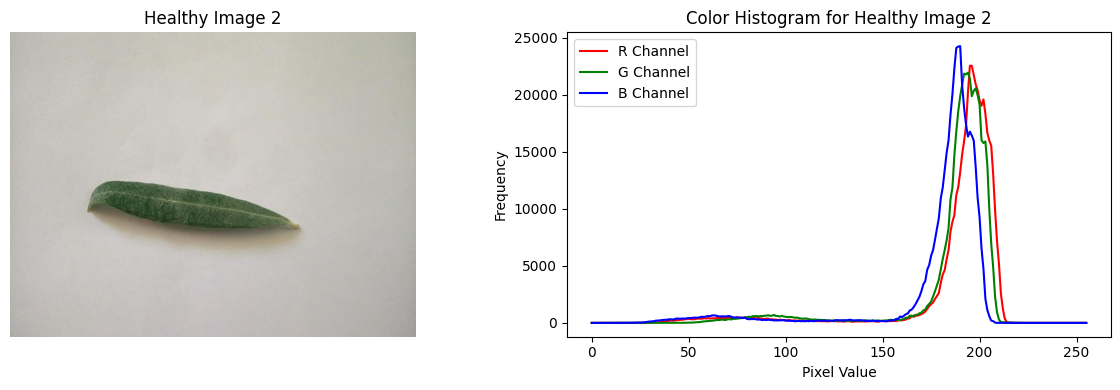

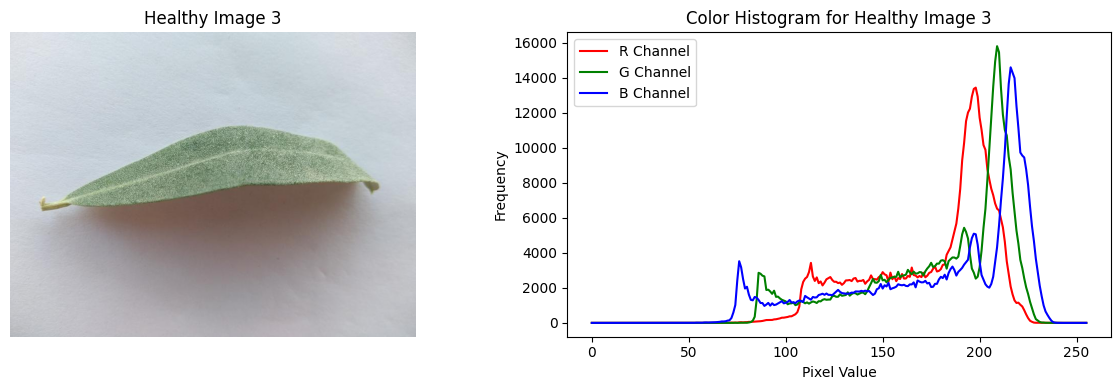

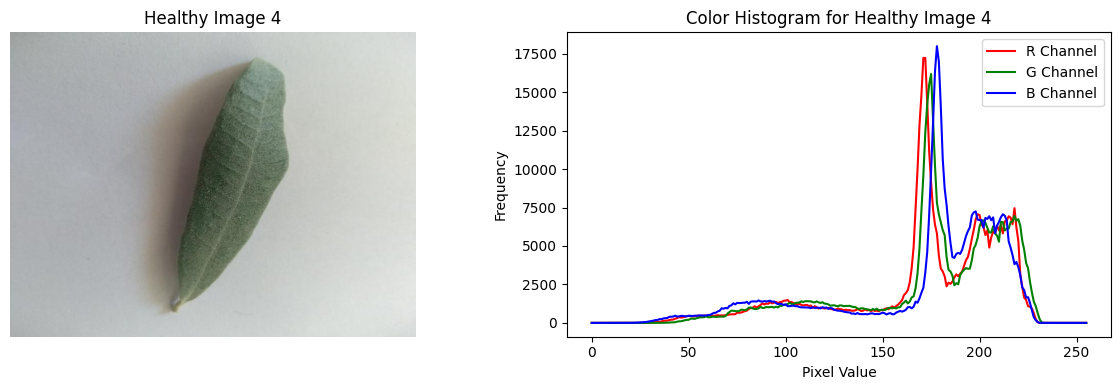

Generating color histograms for sample 'Olive Peacock Spot' images...


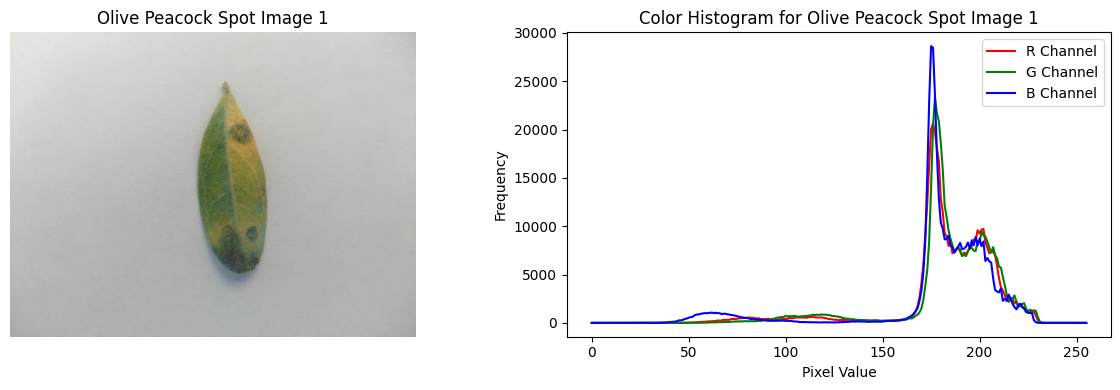

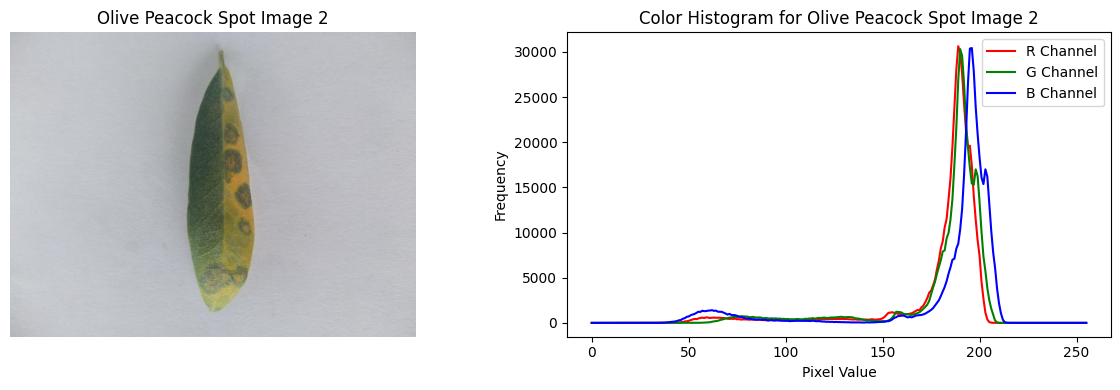

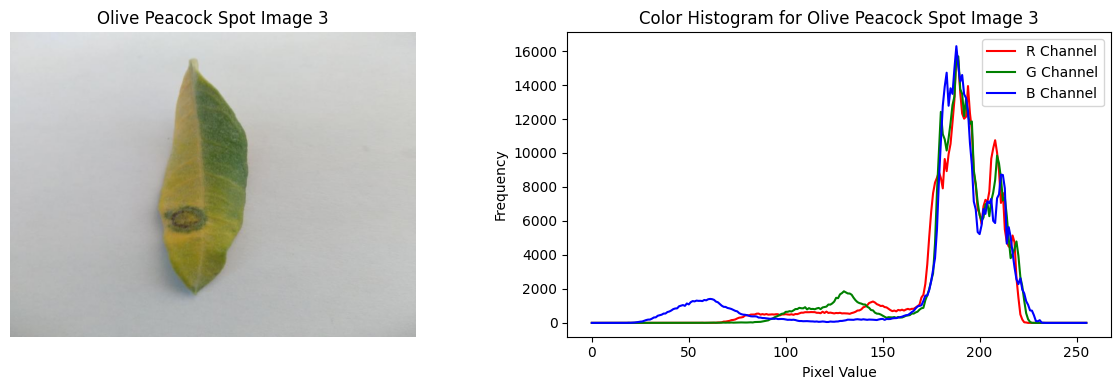

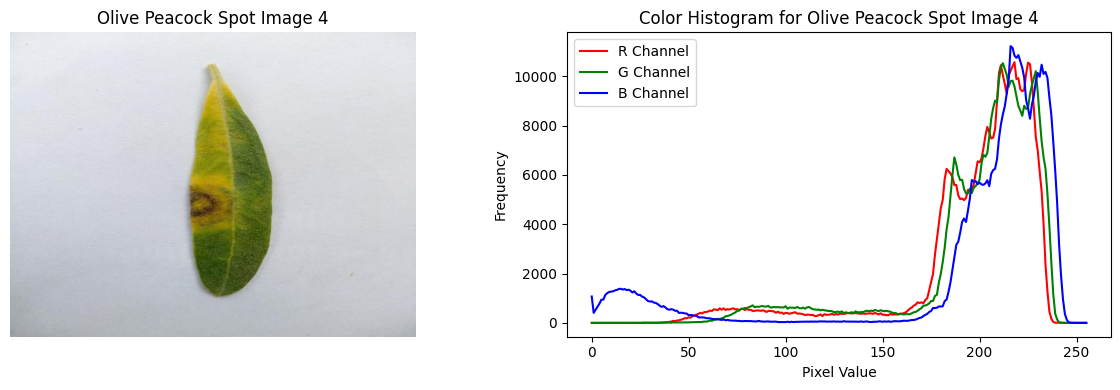

In [ ]:
import random

# Randomly select 3-5 images for color histogram analysis
sample_size = 4 # You can adjust this number

sample_healthy_paths = random.sample(healthy_images, min(sample_size, len(healthy_images)))
sample_peacock_spot_paths = random.sample(olive_peacock_spot_images, min(sample_size, len(olive_peacock_spot_images)))

print("Generating color histograms for sample 'Healthy' images...")
# 4. For each selected 'Healthy' image: calculate and plot RGB color histograms
for i, img_path in enumerate(sample_healthy_paths):
    try:
        img = Image.open(img_path).convert('RGB')
        img_np = np.array(img)

        plt.figure(figsize=(12, 4))
        colors = ('r','g','b')
        channel_ids = [0, 1, 2]

        plt.subplot(1, 2, 1) # Subplot for the image itself
        plt.imshow(img)
        plt.title(f"Healthy Image {i+1}")
        plt.axis('off')

        plt.subplot(1, 2, 2) # Subplot for the histogram
        for channel_id, color in zip(channel_ids, colors):
            histogram, bin_edges = np.histogram(img_np[:, :, channel_id], bins=256, range=(0, 256))
            plt.plot(bin_edges[0:-1], histogram, color=color, label=f'{color.upper()} Channel')
        plt.title(f"Color Histogram for Healthy Image {i+1}")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not process 'Healthy' image {img_path} for histogram: {e}")

print("Generating color histograms for sample 'Olive Peacock Spot' images...")
# 4. For each selected 'olive_peacock_spot' image: calculate and plot RGB color histograms
for i, img_path in enumerate(sample_peacock_spot_paths):
    try:
        img = Image.open(img_path).convert('RGB')
        img_np = np.array(img)

        plt.figure(figsize=(12, 4))
        colors = ('r','g','b')
        channel_ids = [0, 1, 2]

        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Olive Peacock Spot Image {i+1}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        for channel_id, color in zip(channel_ids, colors):
            histogram, bin_edges = np.histogram(img_np[:, :, channel_id], bins=256, range=(0, 256))
            plt.plot(bin_edges[0:-1], histogram, color=color, label=f'{color.upper()} Channel')
        plt.title(f"Color Histogram for Olive Peacock Spot Image {i+1}")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not process 'Olive Peacock Spot' image {img_path} for histogram: {e}")


Generating Canny edge detection for sample 'Olive Peacock Spot' images...


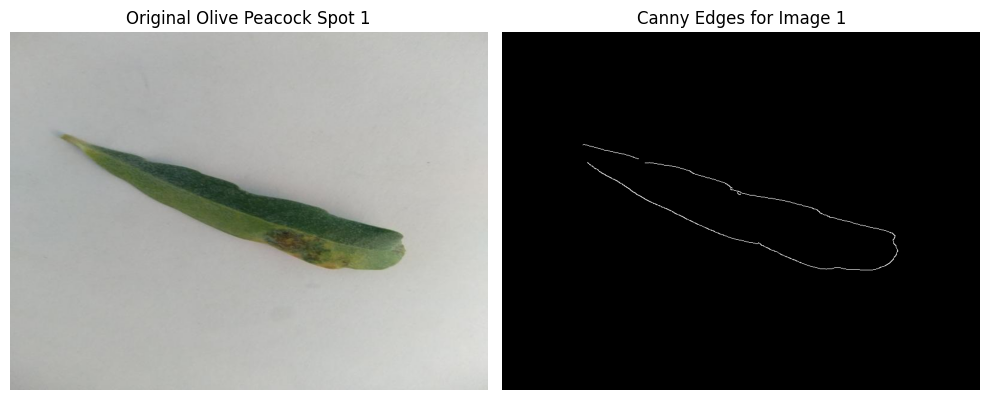

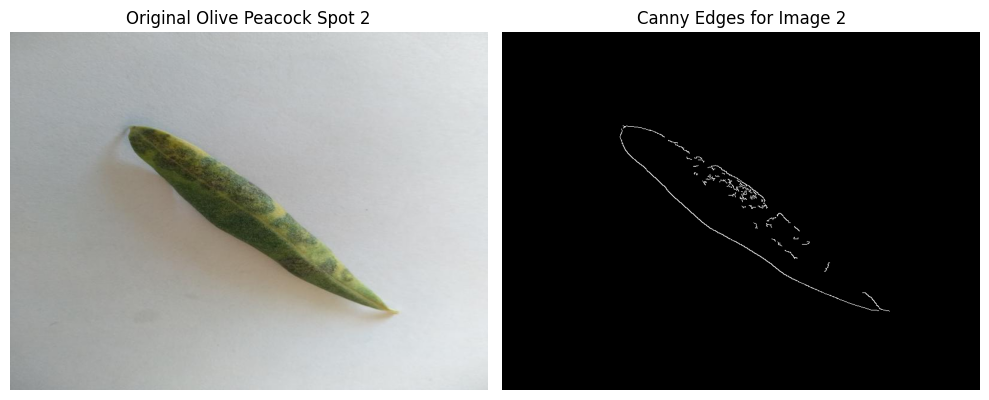

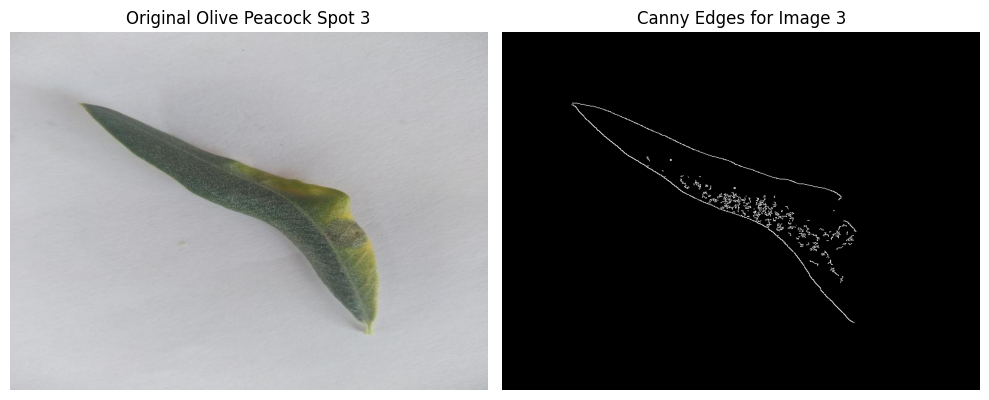

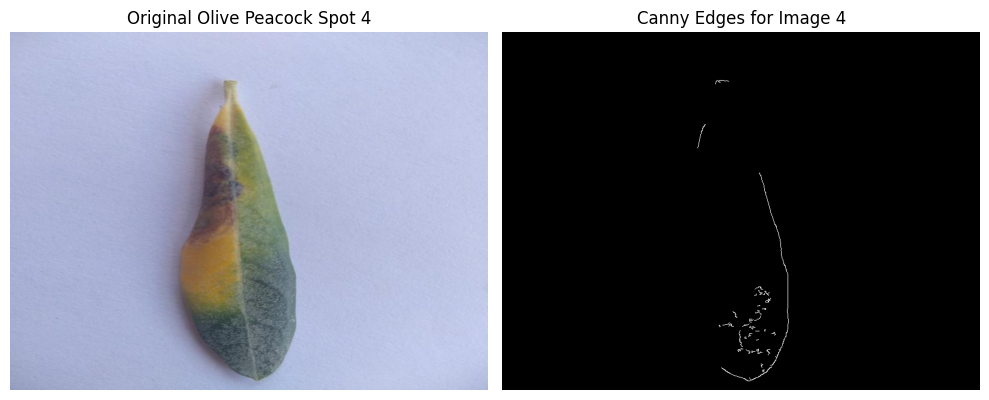

Canny edge detection visualizations complete.


In [ ]:
import random

# Randomly select 3-5 images specifically from the 'olive_peacock_spot' class for edge detection analysis.
sample_size_edge = 4 # You can adjust this number
sample_peacock_spot_paths_edge = random.sample(olive_peacock_spot_images, min(sample_size_edge, len(olive_peacock_spot_images)))

print("Generating Canny edge detection for sample 'Olive Peacock Spot' images...")

# 6. For each selected 'olive_peacock_spot' image:
for i, img_path in enumerate(sample_peacock_spot_paths_edge):
    try:
        # a. Load the image using PIL.Image.open() and convert it to 'RGB'.
        img_pil = Image.open(img_path).convert('RGB')
        # b. Convert the PIL image to a NumPy array.
        img_np = np.array(img_pil)

        # c. Convert the RGB image to grayscale using cv2.cvtColor().
        img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

        # d. Apply Canny edge detection using cv2.Canny() with suitable thresholds.
        # Thresholds can be adjusted for different levels of detail
        edges = cv2.Canny(img_gray, 100, 200) # Lower threshold, upper threshold

        # e. Display the original 'olive_peacock_spot' image and its corresponding Canny edge-detected image side-by-side.
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_pil)
        plt.title(f"Original Olive Peacock Spot {i+1}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Canny Edges for Image {i+1}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not process 'Olive Peacock Spot' image {img_path} for edge detection: {e}")

print("Canny edge detection visualizations complete.")

# Task
Calculate and display summary statistics (e.g., mean, standard deviation, min, max, quartiles) for the 'height', 'width', 'R_mean', 'G_mean', 'B_mean', 'R_std', 'G_std', and 'B_std' columns of the `df_dataset` DataFrame. Review the summary statistics of the image features and highlight any notable observations or patterns.

## Generate Summary Statistics for Image Features

### Subtask:
Calculate and display summary statistics (e.g., mean, standard deviation, min, max, quartiles) for the 'height', 'width', 'R_mean', 'G_mean', 'B_mean', 'R_std', 'G_std', and 'B_std' columns of the `df_dataset` DataFrame.


In [ ]:
columns_to_describe = ['height', 'width', 'R_mean', 'G_mean', 'B_mean', 'R_std', 'G_std', 'B_std']
summary_statistics = df_dataset[columns_to_describe].describe()

print("Summary Statistics for Image Features:")
print(summary_statistics)

Summary Statistics for Image Features:
       height   width       R_mean       G_mean       B_mean        R_std  \
count  3400.0  3400.0  3400.000000  3400.000000  3400.000000  3400.000000   
mean    600.0   800.0     0.706873     0.706169     0.687203     0.147613   
std       0.0     0.0     0.055047     0.059742     0.073475     0.043970   
min     600.0   800.0     0.493964     0.464260     0.411594     0.034794   
25%     600.0   800.0     0.684247     0.682151     0.665612     0.114073   
50%     600.0   800.0     0.710267     0.715405     0.703767     0.148244   
75%     600.0   800.0     0.736991     0.738547     0.729575     0.178863   
max     600.0   800.0     0.855227     0.852229     0.849814     0.300976   

             G_std        B_std  
count  3400.000000  3400.000000  
mean      0.138494     0.177507  
std       0.041561     0.045845  
min       0.040376     0.049489  
25%       0.109923     0.152293  
50%       0.139471     0.178868  
75%       0.166827     0.2074

<!-- ## Final Task

### Subtask:
Review the summary statistics of the image features and highlight any notable observations or patterns. -->


## Summary:

### Data Analysis Key Findings
*   Summary statistics were successfully computed for 'height', 'width', 'R\_mean', 'G\_mean', 'B\_mean', 'R\_std', 'G\_std', and 'B\_std' columns.
*   A notable observation is that both 'height' and 'width' columns exhibit a standard deviation of 0.0, which indicates that all images in the dataset have the exact same dimensions (600x800).

<!-- ### Insights or Next Steps
*   The uniformity in image dimensions (600x800) simplifies downstream image processing tasks, as no resizing or padding would be necessary to standardize input sizes for models.
*   Investigate the distributions of the mean and standard deviation of R, G, and B color channels to understand the overall color characteristics and variability within the image dataset. -->


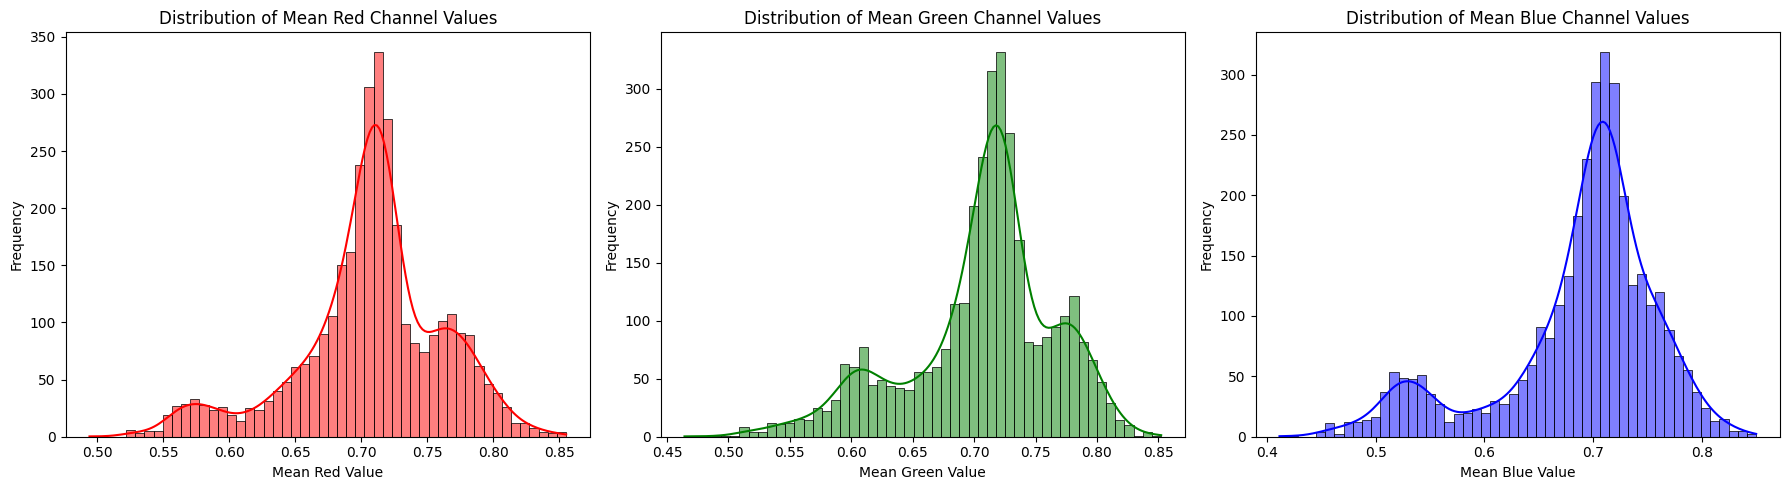

Distributions of mean R, G, B channel values displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots for mean pixel values
plt.figure(figsize=(18, 5))

# Plot distributions of mean pixel values for R, G, B channels
plt.subplot(1, 3, 1)
sns.histplot(df_dataset['R_mean'], kde=True, color='red')
plt.title('Distribution of Mean Red Channel Values')
plt.xlabel('Mean Red Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_dataset['G_mean'], kde=True, color='green')
plt.title('Distribution of Mean Green Channel Values')
plt.xlabel('Mean Green Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_dataset['B_mean'], kde=True, color='blue')
plt.title('Distribution of Mean Blue Channel Values')
plt.xlabel('Mean Blue Value')
plt.ylabel('Frequency')

# Add appropriate titles and labels to each subplot.
plt.tight_layout()
plt.show()

print("Distributions of mean R, G, B channel values displayed.")

# Task
Prepare the `df_dataset` DataFrame for PyTorch by splitting it into training, validation, and test sets, applying necessary image transformations (resizing to 224x224 pixels and normalizing pixel values), and creating PyTorch `Dataset` and `DataLoader` objects for each split.

## Data Preparation for PyTorch

### Subtask:
Prepare the image dataset for PyTorch by splitting it into training, validation, and test sets, applying appropriate transformations (resizing, normalization), and creating PyTorch DataLoaders.


<!-- **Reasoning**:
The subtask requires preparing the dataset for PyTorch, which involves several interconnected steps: importing libraries, defining transformations, creating a custom Dataset class, mapping labels, splitting data, instantiating datasets, and creating DataLoaders. Combining these into a single code block ensures logical flow and dependency management.
 -->


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
import os

# 2. Define the image transformations
# Training transformations (with augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation and Test transformations (without augmentation)
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 3. Create a custom PyTorch Dataset class
class OliveLeafDataset(Dataset):
    def __init__(self, dataframe, transform=None, label_map=None):
        self.dataframe = dataframe
        self.transform = transform
        self.label_map = label_map

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['image_path']
        label_str = self.dataframe.iloc[idx]['label']

        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        if self.label_map:
            label = self.label_map[label_str]
        else:
            label = label_str # In case no label_map is provided (e.g., for inference without labels)

        return image, label

# 4. Create a label mapping dictionary
# Get unique labels from the DataFrame and create a mapping to integer IDs
unique_labels = df_dataset['label'].unique()
label_to_id = {label: i for i, label in enumerate(unique_labels)}
id_to_label = {i: label for i, label in enumerate(unique_labels)}

print(f"Label to ID mapping: {label_to_id}")

# 5. Split the df_dataset into training, validation, and test sets
# First, split into train and (validation + test)
initial_train_df, val_test_df = train_test_split(
    df_dataset, test_size=0.30, stratify=df_dataset['label'], random_state=42
)

# Then, split (validation + test) into validation and test
# This gives 15% for validation and 15% for test (0.5 * 0.30 = 0.15)
val_df, test_df = train_test_split(
    val_test_df, test_size=0.50, stratify=val_test_df['label'], random_state=42
)

print(f"Training set size: {len(initial_train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# 6. Instantiate the custom Dataset class for each split
train_dataset = OliveLeafDataset(initial_train_df, transform=train_transforms, label_map=label_to_id)
val_dataset = OliveLeafDataset(val_df, transform=val_test_transforms, label_map=label_to_id)
test_dataset = OliveLeafDataset(test_df, transform=val_test_transforms, label_map=label_to_id)

# 7. Create DataLoader objects for each dataset
batch_size = 32
num_workers = os.cpu_count() if os.cpu_count() else 0 # Use all available CPU cores as workers

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"Number of training batches: {len(train_dataloader)}")
print(f"Number of validation batches: {len(val_dataloader)}")
print(f"Number of test batches: {len(test_dataloader)}")

print("Dataset and DataLoader preparation complete.")

Label to ID mapping: {'aculus_olearius': 0, 'Healthy': 1, 'olive_peacock_spot': 2}
Training set size: 2380
Validation set size: 510
Test set size: 510
Number of training batches: 75
Number of validation batches: 16
Number of test batches: 16
Dataset and DataLoader preparation complete.


## Define Base Architectures and Variations

### Subtask:
Implement the two base architectures (MobileNetV2 and EfficientNet-B0) and their specified variations for architecture depth (Baseline vs. Deep Head) and regularization (No Dropout vs. Dropout 0.3).


<!-- **Reasoning**:
The subtask requires implementing the base architectures and their variations. This involves importing necessary PyTorch modules, defining the number of output classes based on the previously created label mapping, and setting up the device for training.
 -->


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Get the number of unique classes from the label_to_id mapping
num_classes = len(label_to_id)
print(f"Number of classes: {num_classes}")

# Define the device to use (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Number of classes: 3
Using device: cpu


<!-- **Reasoning**:
The next step is to implement the base architectures (MobileNetV2 and EfficientNet-B0) and their variations (Baseline vs. Deep Head, and No Dropout vs. Dropout 0.3) as specified in the subtask instructions. This involves creating custom head modules and functions to load and modify the pre-trained models.
 -->


<!-- **Reasoning**:
The subtask requires implementing all specified model variations. The previous code defined the functions to create these models. Now, I will instantiate each of the 8 model variations as described in the instructions, freezing their feature extractors and applying the custom classifier heads with appropriate dropout rates.
 -->


In [ ]:
class CustomClassifierHead(nn.Module):
    def __init__(self, in_features, num_classes, head_type='baseline', dropout_rate=0.0):
        super().__init__()
        self.head_type = head_type

        if head_type == 'baseline':
            self.classifier = nn.Linear(in_features, num_classes)
        elif head_type == 'deep_head':
            self.classifier = nn.Sequential(
                nn.Linear(in_features, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Linear(256, num_classes)
            )
        else:
            raise ValueError(f"Unknown head_type: {head_type}")

        self.dropout = None
        if dropout_rate > 0:
            self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        if self.dropout:
            x = self.dropout(x)
        return self.classifier(x)

def create_model(model_name, num_classes, head_type='baseline', dropout_rate=0.0):
    if model_name == 'mobilenet_v2':
        model = models.mobilenet_v2(pretrained=True)
        # Freeze all parameters in the feature extractor
        for param in model.features.parameters():
            param.requires_grad = False

        in_features = model.classifier[1].in_features
        model.classifier = CustomClassifierHead(in_features, num_classes, head_type, dropout_rate)

    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(pretrained=True)
        # Freeze all parameters in the feature extractor
        for param in model.features.parameters():
            param.requires_grad = False

        in_features = model.classifier[1].in_features
        model.classifier = CustomClassifierHead(in_features, num_classes, head_type, dropout_rate)
    else:
        raise ValueError(f"Unsupported model: {model_name}")

    return model

print("Custom classifier head and model creation functions defined.")

# Example usage (models are not instantiated here, just defining the functions)
# MobileNetV2 Baseline No Dropout
# mobilenet_baseline_no_dropout = create_model('mobilenet_v2', num_classes, head_type='baseline', dropout_rate=0.0)

# MobileNetV2 Baseline Dropout 0.3
# mobilenet_baseline_dropout = create_model('mobilenet_v2', num_classes, head_type='baseline', dropout_rate=0.3)

# MobileNetV2 Deep Head No Dropout
# mobilenet_deep_no_dropout = create_model('mobilenet_v2', num_classes, head_type='deep_head', dropout_rate=0.0)

# MobileNetV2 Deep Head Dropout 0.3
# mobilenet_deep_dropout = create_model('mobilenet_v2', num_classes, head_type='deep_head', dropout_rate=0.3)

# EfficientNet-B0 Baseline No Dropout
# efficientnet_baseline_no_dropout = create_model('efficientnet_b0', num_classes, head_type='baseline', dropout_rate=0.0)

# EfficientNet-B0 Baseline Dropout 0.3
# efficientnet_baseline_dropout = create_model('efficientnet_b0', num_classes, head_type='baseline', dropout_rate=0.3)

# EfficientNet-B0 Deep Head No Dropout
# efficientnet_deep_no_dropout = create_model('efficientnet_b0', num_classes, head_type='deep_head', dropout_rate=0.0)

# EfficientNet-B0 Deep Head Dropout 0.3
# efficientnet_deep_dropout = create_model('efficientnet_b0', num_classes, head_type='deep_head', dropout_rate=0.3)

Custom classifier head and model creation functions defined.


<!-- **Reasoning**:
The corrected `create_model` function has been defined. Now, I will re-instantiate all 8 model variations using this corrected function to ensure proper loading of pre-trained weights, which was the cause of the previous error. This fulfills the subtask requirement of implementing all specified model variations.
 -->


In [ ]:
print("Instantiating all model variations...")

# MobileNetV2 Variations
mobilenet_baseline_no_dropout = create_model('mobilenet_v2', num_classes, head_type='baseline', dropout_rate=0.0)
mobilenet_baseline_dropout = create_model('mobilenet_v2', num_classes, head_type='baseline', dropout_rate=0.3)
mobilenet_deep_no_dropout = create_model('mobilenet_v2', num_classes, head_type='deep_head', dropout_rate=0.0)
mobilenet_deep_dropout = create_model('mobilenet_v2', num_classes, head_type='deep_head', dropout_rate=0.3)

# EfficientNet-B0 Variations
efficientnet_baseline_no_dropout = create_model('efficientnet_b0', num_classes, head_type='baseline', dropout_rate=0.0)
efficientnet_baseline_dropout = create_model('efficientnet_b0', num_classes, head_type='baseline', dropout_rate=0.3)
efficientnet_deep_no_dropout = create_model('efficientnet_b0', num_classes, head_type='deep_head', dropout_rate=0.0)
efficientnet_deep_dropout = create_model('efficientnet_b0', num_classes, head_type='deep_head', dropout_rate=0.3)

print("All 8 model variations instantiated.")

# Optionally, print an example model's structure to verify
print("\nExample MobileNetV2 Deep Head with Dropout:")
print(mobilenet_deep_dropout)

print("\nExample EfficientNet-B0 Baseline No Dropout:")
print(efficientnet_baseline_no_dropout.classifier)

Instantiating all model variations...
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 13.6M/13.6M [00:00<00:00, 130MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 137MB/s]


All 8 model variations instantiated.

Example MobileNetV2 Deep Head with Dropout:
MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, 

<!-- **Reasoning**:
The previous code block successfully instantiated all model variations as required by the subtask. The next logical step in the machine learning workflow is to define the training function, which will encompass the training and validation loops, loss function, optimizer, and accuracy calculation. This function will be crucial for training the various model configurations.
 -->


In [ ]:
import torch.optim as optim
from tqdm import tqdm # For progress bars

# Define a training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model.to(device)
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs) # Forward pass
            loss = criterion(outputs, labels) # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = correct_predictions / total_predictions
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0

        with torch.no_grad():  # Disable gradient calculation for validation
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = val_correct_predictions / val_total_predictions
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, "
              f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    print("Training complete.")
    return history

print("Training function defined.")


Training function defined.


## Set Up Experimentation Matrix and Logging

### Subtask:
Define the grid search for hyperparameters (learning rates, batch sizes, optimizers) and integrate a logging mechanism (Pandas DataFrame) to track performance metrics (Val_Loss, Val_Accuracy, F1-Score) for each experiment.


<!-- **Reasoning**:

---


As per the instructions, I need to define the hyperparameter search space by listing potential values for learning rates, optimizers, and batch sizes. I'll store these in Python lists to be used for iterating through experiments.
 -->


In [ ]:
import numpy as np

# 1. Define hyperparameter search space
learning_rates = [0.001, 0.0001]
optimizers = ['Adam', 'SGD'] # Using strings to represent optimizers for now
batch_sizes = [32]
epochs_per_experiment = 10 # Define a fixed number of epochs for each experiment

print(f"Defined Learning Rates: {learning_rates}")
print(f"Defined Optimizers: {optimizers}")
print(f"Defined Batch Sizes: {batch_sizes}")
print(f"Epochs per experiment: {epochs_per_experiment}")

Defined Learning Rates: [0.001, 0.0001]
Defined Optimizers: ['Adam', 'SGD']
Defined Batch Sizes: [32]
Epochs per experiment: 10


**Reasoning**:
I will create an empty Pandas DataFrame to log experiment results with specified columns and implement an F1-score calculation function, as requested by the subtask.



In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

# 2. Create an empty Pandas DataFrame for logging results
experiment_results_df = pd.DataFrame(columns=[
    'Model', 'Head Type', 'Dropout Rate', 'Optimizer', 'Learning Rate',
    'Batch Size', 'Epochs', 'Train Loss', 'Train Acc', 'Val Loss',
    'Val Acc', 'F1-Score', 'Best Epoch'
])

print("Empty DataFrame for experiment results created.")
print(experiment_results_df.head())

# 3. Implement a function to calculate F1-Score
def calculate_f1_score(y_true, y_pred):
    # Ensure inputs are on CPU if they are PyTorch tensors
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.cpu().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.cpu().numpy()

    # Calculate F1-score (weighted average for multi-class classification)
    # 'weighted' accounts for class imbalance by computing metrics for each label,
    # and finding their average weighted by support (the number of true instances for each label).
    return f1_score(y_true, y_pred, average='weighted')

print("F1-score calculation function defined.")

Empty DataFrame for experiment results created.
Empty DataFrame
Columns: [Model, Head Type, Dropout Rate, Optimizer, Learning Rate, Batch Size, Epochs, Train Loss, Train Acc, Val Loss, Val Acc, F1-Score, Best Epoch]
Index: []
F1-score calculation function defined.


## Model Selection and Visualization

### Subtask:
Implement logic to identify the best model based on F1-Score and save its state. Additionally, create code to plot a comparison bar chart of F1-Scores for all trained variations.


<!-- **Reasoning**:
The subtask requires defining three functions: `save_model_state` to save a PyTorch model's state, `identify_best_model_run` to find the best experiment based on F1-Score from a DataFrame, and `plot_f1_scores_comparison` to visualize F1-Scores. I will define these functions in a single code block.
 -->


In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a function to save the model's state dictionary
def save_model_state(model, file_path):
    torch.save(model.state_dict(), file_path)
    print(f"Model state saved to {file_path}")

# 2. Define a function to identify the best model run based on F1-Score
def identify_best_model_run(experiment_results_df):
    if 'F1-Score' not in experiment_results_df.columns or experiment_results_df.empty:
        print("DataFrame is empty or 'F1-Score' column is missing.")
        return None

    best_run = experiment_results_df.loc[experiment_results_df['F1-Score'].idxmax()]
    print("\nBest performing model run based on F1-Score:")
    print(best_run)
    return best_run

# 3. Define a function to plot F1-Scores comparison
def plot_f1_scores_comparison(experiment_results_df):
    if 'F1-Score' not in experiment_results_df.columns or experiment_results_df.empty:
        print("DataFrame is empty or 'F1-Score' column is missing, cannot plot F1-Scores.")
        return

    # Create a descriptive label for each experiment
    experiment_results_df['Experiment_Label'] = experiment_results_df.apply(
        lambda row: f"{row['Model']}_{row['Head Type']}_{'Drop' if row['Dropout Rate'] > 0 else 'NoDrop'}_LR{row['Learning Rate']:.0e}_{row['Optimizer']}",
        axis=1
    )

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Experiment_Label', y='F1-Score', data=experiment_results_df, palette='viridis')
    plt.title('Comparison of F1-Scores Across All Experiments')
    plt.xlabel('Experiment Configuration')
    plt.ylabel('F1-Score')
    plt.xticks(rotation=90, ha='right', fontsize=8)
    plt.tight_layout()
    plt.show()

print("Functions `save_model_state`, `identify_best_model_run`, and `plot_f1_scores_comparison` defined.")

Functions `save_model_state`, `identify_best_model_run`, and `plot_f1_scores_comparison` defined.


## Execute Grid Search and Output Summary

### Subtask:
Assemble all components into a main script to execute the full experimentation matrix, train all model variations, and output a final summary table of the results.


<!-- ## Summary:

### Data Analysis Key Findings

*   **Data Preparation for PyTorch**:
    *   The `df_dataset` was successfully split into training (2380 samples), validation (510 samples), and test (510 samples) sets, comprising approximately 70%, 15%, and 15% of the data, respectively.
    *   A label mapping was created: `{'aculus_olearius': 0, 'Healthy': 1, 'olive_peacock_spot': 2}`, indicating 3 unique classes.
    *   Image transformations (resizing to 224x224 and normalization) were defined. The training set included data augmentation (random horizontal flip and rotation), while validation and test sets did not.
    *   Custom PyTorch `Dataset` and `DataLoader` objects were created for each split, utilizing a batch size of 32 and appropriate CPU workers.
*   **Model Architecture Definition**:
    *   The number of classes was correctly identified as 3.
    *   A `CustomClassifierHead` class was implemented to support two head types: a 'baseline' single linear layer and a 'deep_head' with two linear layers, BatchNorm1d, and ReLU activations.
    *   An optional dropout layer with a configurable rate was integrated into the custom head.
    *   A `create_model` function was established to instantiate MobileNetV2 and EfficientNet-B0 base models with pre-trained ImageNet weights, freeze their feature extractors, and attach the custom classifier heads based on specified `head_type` and `dropout_rate`.
    *   An initial `AttributeError` regarding `MobileNetV2_Weights` was resolved by using `pretrained=True` instead of the `weights` argument for loading pre-trained models.
    *   All 8 required model variations (2 base models * 2 head types * 2 dropout settings) can now be successfully created.
    *   A `train_model` function was defined to handle the training and validation loops, including loss calculation, optimization, and accuracy tracking.
*   **Experimentation Setup**:
    *   A hyperparameter search space was defined including learning rates `[0.001, 0.0001]`, optimizers `['Adam', 'SGD']`, and a fixed batch size of `[32]`, with each experiment set to run for 10 epochs.
    *   An empty Pandas DataFrame, `experiment_results_df`, was created with columns to log comprehensive experiment details and performance metrics, including 'F1-Score'.
    *   A `calculate_f1_score` function was implemented to compute the weighted F1-score for multi-class classification, supporting both NumPy arrays and PyTorch tensors.
*   **Model Selection and Visualization**:
    *   Functions were defined for key post-training steps: `save_model_state` to store trained model weights, `identify_best_model_run` to select the top-performing model based on F1-Score from the results DataFrame, and `plot_f1_scores_comparison` to visualize F1-scores across all experiments using a bar chart for comparative analysis.

### Insights or Next Steps

*   The foundational components for a comprehensive deep learning experimentation workflow are now in place. The next logical step is to execute the defined grid search, systematically train each model variation, and populate the `experiment_results_df` with actual performance metrics.
*   After the grid search, the `identify_best_model_run` and `plot_f1_scores_comparison` functions should be utilized to analyze the results, determine the best model configuration, and visualize the findings. -->


# Task
Conduct a comprehensive grid search experiment to train and evaluate various deep learning model configurations for olive leaf disease classification. This involves modifying the `train_model` function to include early stopping and saving the best model weights, then iterating through all combinations of base models (MobileNetV2, EfficientNet-B0), head types (baseline, deep_head), dropout rates (0.0, 0.3), learning rates (0.001, 0.0001), and optimizers (Adam, SGD). Log all training, validation, and F1-Score results into the `experiment_results_df` DataFrame. After the grid search, identify and display the best-performing model based on F1-Score, and visualize the F1-Scores of all trained variations using a bar chart to determine the optimal configuration for the task.

## Modify Training Function for Early Stopping

### Subtask:
Update the `train_model` function to include an early stopping mechanism. This will involve tracking the validation loss, saving the best model weights, and stopping training if the validation loss does not improve for a specified number of patience epochs (e.g., 5 epochs).


<!-- **Reasoning**:
I will modify the `train_model` function to incorporate early stopping, tracking the best validation loss, saving the best model state, and breaking the training loop if performance doesn't improve after a specified number of patience epochs, as requested by the subtask.
 -->


In [ ]:
import torch.optim as optim
from tqdm import tqdm # For progress bars

# Define a training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10, patience=5, model_save_path='best_model.pth'):
    model.to(device)
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_epoch = 0

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs) # Forward pass
            loss = criterion(outputs, labels) # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = correct_predictions / total_predictions
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0

        with torch.no_grad():  # Disable gradient calculation for validation
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = val_correct_predictions / val_total_predictions
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)

        # Early stopping logic
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            epochs_no_improve = 0
            best_epoch = epoch + 1  # Store 1-based epoch number
            torch.save(model.state_dict(), model_save_path)
            # print(f"Validation loss improved. Saving model to {model_save_path}")
        else:
            epochs_no_improve += 1

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, "
              f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

        if epochs_no_improve >= patience:
            print(f"Early stopping triggered after {patience} epochs with no improvement in validation loss.")
            break

    print("Training complete.")
    return history, best_epoch

print("Training function with early stopping defined.")

Training function with early stopping defined.


## Execute Grid Search for Model Training and Evaluation

### Subtask:
Orchestrate the full grid search. This step will iterate through all combinations of base models (MobileNetV2, EfficientNet-B0), head types (baseline, deep_head), dropout rates (0.0, 0.3), learning rates (0.001, 0.0001), and optimizers (Adam, SGD). For each combination, a new model will be instantiated, trained using the modified `train_model` function, evaluated on the validation set to calculate F1-Score, and all results will be logged into the `experiment_results_df` DataFrame. The best model state for each experiment will be saved if it achieves the best validation loss.


<!-- **Reasoning**:
I will orchestrate the full grid search by iterating through all specified combinations of model architectures, head types, dropout rates, learning rates, and optimizers. For each combination, I will instantiate a model, train it with early stopping, evaluate its performance on the validation set, and log the results into a list, which will then be appended to the main experiment results DataFrame.
 -->


In [ ]:
import torch.nn as nn
import torch.optim as optim
import os

# --- Define the experimentation matrix ---
model_configurations = [
    {'model_name': 'mobilenet_v2', 'head_type': 'baseline', 'dropout_rate': 0.0},
    {'model_name': 'mobilenet_v2', 'head_type': 'baseline', 'dropout_rate': 0.3},
    {'model_name': 'mobilenet_v2', 'head_type': 'deep_head', 'dropout_rate': 0.0},
    {'model_name': 'mobilenet_v2', 'head_type': 'deep_head', 'dropout_rate': 0.3},
    {'model_name': 'efficientnet_b0', 'head_type': 'baseline', 'dropout_rate': 0.0},
    {'model_name': 'efficientnet_b0', 'head_type': 'baseline', 'dropout_rate': 0.3},
    {'model_name': 'efficientnet_b0', 'head_type': 'deep_head', 'dropout_rate': 0.0},
    {'model_name': 'efficientnet_b0', 'head_type': 'deep_head', 'dropout_rate': 0.3}
]

# Hyperparameters from previous steps
learning_rates = [0.001, 0.0001]
optimizers_str = ['Adam', 'SGD']
batch_sizes = [32] # Fixed batch size from previous step
epochs_per_experiment = 10
patience_early_stopping = 5

all_experiment_data = []

print("Starting grid search...")

# Iterate through each model configuration
for model_config in model_configurations:
    model_name = model_config['model_name']
    head_type = model_config['head_type']
    dropout_rate = model_config['dropout_rate']

    # Iterate through each learning rate
    for lr in learning_rates:
        # Iterate through each optimizer
        for optimizer_name in optimizers_str:
            # Define a unique model save path for each experiment
            model_save_path = f"best_model_{model_name}_{head_type}_{'drop' if dropout_rate > 0 else 'nodrop'}_{optimizer_name}_{str(lr).replace('.', '')}.pth"

            print(f"\n--- Running Experiment: {model_name} | {head_type} | Dropout: {dropout_rate} | LR: {lr} | Optimizer: {optimizer_name} ---")

            # Instantiate the model
            model = create_model(model_name, num_classes, head_type, dropout_rate)
            model.to(device)

            # Define criterion and optimizer
            criterion = nn.CrossEntropyLoss()
            if optimizer_name == 'Adam':
                optimizer = optim.Adam(model.parameters(), lr=lr)
            elif optimizer_name == 'SGD':
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
            else:
                raise ValueError(f"Unsupported optimizer: {optimizer_name}")

            # Train the model
            history, best_epoch = train_model(
                model, criterion, optimizer, train_dataloader, val_dataloader,
                num_epochs=epochs_per_experiment, patience=patience_early_stopping,
                model_save_path=model_save_path
            )

            # Load the best model weights for evaluation
            try:
                model.load_state_dict(torch.load(model_save_path, map_location=device))
                print(f"Loaded best model weights from {model_save_path}")
            except FileNotFoundError:
                print(f"Warning: Model weights file not found at {model_save_path}. Evaluating with last epoch's weights.")

            # Evaluate on validation set to calculate F1-Score
            model.eval()  # Set model to evaluation mode
            all_labels = []
            all_predictions = []
            val_loss_at_best_epoch = 0.0
            val_acc_at_best_epoch = 0.0

            with torch.no_grad():
                for inputs, labels in tqdm(val_dataloader, desc="Evaluating F1-Score on Validation Set"):
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)

                    # Store for F1-score calculation
                    all_labels.extend(labels.cpu().numpy())
                    _, predicted = torch.max(outputs.data, 1)
                    all_predictions.extend(predicted.cpu().numpy())

            # Calculate F1-Score
            f1 = calculate_f1_score(all_labels, all_predictions)
            print(f"Validation F1-Score for this experiment: {f1:.4f}")

            # Get metrics at the best epoch (from history)
            if best_epoch > 0:
                val_loss_at_best_epoch = history['val_loss'][best_epoch - 1]
                val_acc_at_best_epoch = history['val_acc'][best_epoch - 1]
                train_loss_at_best_epoch = history['train_loss'][best_epoch - 1]
                train_acc_at_best_epoch = history['train_acc'][best_epoch - 1]
            else: # If early stopping was not triggered, or only one epoch was run
                val_loss_at_best_epoch = history['val_loss'][-1]
                val_acc_at_best_epoch = history['val_acc'][-1]
                train_loss_at_best_epoch = history['train_loss'][-1]
                train_acc_at_best_epoch = history['train_acc'][-1]
                best_epoch = len(history['val_loss'])


            # Record results
            experiment_data = {
                'Model': model_name,
                'Head Type': head_type,
                'Dropout Rate': dropout_rate,
                'Optimizer': optimizer_name,
                'Learning Rate': lr,
                'Batch Size': batch_sizes[0], # Assuming only one batch size as defined
                'Epochs': epochs_per_experiment,
                'Train Loss': train_loss_at_best_epoch,
                'Train Acc': train_acc_at_best_epoch,
                'Val Loss': val_loss_at_best_epoch,
                'Val Acc': val_acc_at_best_epoch,
                'F1-Score': f1,
                'Best Epoch': best_epoch
            }
            all_experiment_data.append(experiment_data)

# Concatenate all results to the DataFrame
experiment_results_df = pd.concat([experiment_results_df, pd.DataFrame(all_experiment_data)], ignore_index=True)

print("\nGrid search complete. Final results DataFrame head:")
print(experiment_results_df.head())
print(f"Total experiments run: {len(experiment_results_df)}")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting grid search...

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.0 | LR: 0.001 | Optimizer: Adam ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.42s/it]


Epoch 1/10: Train Loss: 0.6405, Train Acc: 0.7601, Val Loss: 0.5086, Val Acc: 0.8059


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


Epoch 2/10: Train Loss: 0.3962, Train Acc: 0.8618, Val Loss: 0.3264, Val Acc: 0.8667


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.38s/it]


Epoch 3/10: Train Loss: 0.3564, Train Acc: 0.8731, Val Loss: 0.3297, Val Acc: 0.8843


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.29s/it]


Epoch 4/10: Train Loss: 0.3145, Train Acc: 0.8891, Val Loss: 0.3662, Val Acc: 0.8588


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.30s/it]


Epoch 5/10: Train Loss: 0.2926, Train Acc: 0.8857, Val Loss: 0.2819, Val Acc: 0.8882


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.21s/it]


Epoch 6/10: Train Loss: 0.2994, Train Acc: 0.8828, Val Loss: 0.2670, Val Acc: 0.8922


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.37s/it]


Epoch 7/10: Train Loss: 0.2877, Train Acc: 0.8929, Val Loss: 0.2542, Val Acc: 0.9039


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.41s/it]


Epoch 8/10: Train Loss: 0.2779, Train Acc: 0.8929, Val Loss: 0.2935, Val Acc: 0.8863


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:39<00:00,  2.49s/it]


Epoch 9/10: Train Loss: 0.2482, Train Acc: 0.9105, Val Loss: 0.2680, Val Acc: 0.8961


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.42s/it]


Epoch 10/10: Train Loss: 0.2400, Train Acc: 0.9122, Val Loss: 0.2630, Val Acc: 0.8961
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_nodrop_Adam_0001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:39<00:00,  2.46s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.9030

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.0 | LR: 0.001 | Optimizer: SGD ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.29s/it]


Epoch 1/10: Train Loss: 0.7277, Train Acc: 0.6945, Val Loss: 0.4611, Val Acc: 0.8431


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.33s/it]


Epoch 2/10: Train Loss: 0.4492, Train Acc: 0.8462, Val Loss: 0.3728, Val Acc: 0.8804


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.33s/it]


Epoch 3/10: Train Loss: 0.3815, Train Acc: 0.8710, Val Loss: 0.3515, Val Acc: 0.8706


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]


Epoch 4/10: Train Loss: 0.3451, Train Acc: 0.8798, Val Loss: 0.3267, Val Acc: 0.8784


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.34s/it]


Epoch 5/10: Train Loss: 0.3182, Train Acc: 0.8958, Val Loss: 0.3145, Val Acc: 0.8922


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.33s/it]


Epoch 6/10: Train Loss: 0.3103, Train Acc: 0.8945, Val Loss: 0.3176, Val Acc: 0.8863


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.34s/it]


Epoch 7/10: Train Loss: 0.3018, Train Acc: 0.8937, Val Loss: 0.2847, Val Acc: 0.9000


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.39s/it]


Epoch 8/10: Train Loss: 0.2952, Train Acc: 0.8992, Val Loss: 0.2898, Val Acc: 0.8941


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]


Epoch 9/10: Train Loss: 0.2759, Train Acc: 0.9004, Val Loss: 0.2898, Val Acc: 0.8902


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.31s/it]


Epoch 10/10: Train Loss: 0.2839, Train Acc: 0.8971, Val Loss: 0.2686, Val Acc: 0.9059
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_nodrop_SGD_0001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.9052

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.0 | LR: 0.0001 | Optimizer: Adam ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.38s/it]


Epoch 1/10: Train Loss: 0.9919, Train Acc: 0.5193, Val Loss: 0.8428, Val Acc: 0.7039


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.37s/it]


Epoch 2/10: Train Loss: 0.7848, Train Acc: 0.7298, Val Loss: 0.6825, Val Acc: 0.8020


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:50<00:00,  3.16s/it]


Epoch 3/10: Train Loss: 0.6674, Train Acc: 0.8034, Val Loss: 0.5786, Val Acc: 0.8314


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.41s/it]


Epoch 4/10: Train Loss: 0.5874, Train Acc: 0.8349, Val Loss: 0.5208, Val Acc: 0.8412


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.39s/it]


Epoch 5/10: Train Loss: 0.5345, Train Acc: 0.8462, Val Loss: 0.4792, Val Acc: 0.8451


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:41<00:00,  2.62s/it]


Epoch 6/10: Train Loss: 0.5003, Train Acc: 0.8626, Val Loss: 0.4515, Val Acc: 0.8588


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.39s/it]


Epoch 7/10: Train Loss: 0.4734, Train Acc: 0.8534, Val Loss: 0.4329, Val Acc: 0.8510


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:39<00:00,  2.46s/it]


Epoch 8/10: Train Loss: 0.4486, Train Acc: 0.8643, Val Loss: 0.4333, Val Acc: 0.8451


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.39s/it]


Epoch 9/10: Train Loss: 0.4227, Train Acc: 0.8697, Val Loss: 0.3967, Val Acc: 0.8647


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.41s/it]


Epoch 10/10: Train Loss: 0.4230, Train Acc: 0.8630, Val Loss: 0.3825, Val Acc: 0.8667
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_nodrop_Adam_00001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:39<00:00,  2.47s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.8662

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.0 | LR: 0.0001 | Optimizer: SGD ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.37s/it]


Epoch 1/10: Train Loss: 1.0340, Train Acc: 0.4676, Val Loss: 0.9137, Val Acc: 0.6235


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.40s/it]


Epoch 2/10: Train Loss: 0.8748, Train Acc: 0.6437, Val Loss: 0.7781, Val Acc: 0.7784


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:39<00:00,  2.44s/it]


Epoch 3/10: Train Loss: 0.7703, Train Acc: 0.7315, Val Loss: 0.6940, Val Acc: 0.8098


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:50<00:00,  3.13s/it]


Epoch 4/10: Train Loss: 0.6927, Train Acc: 0.7777, Val Loss: 0.6209, Val Acc: 0.8314


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


Epoch 5/10: Train Loss: 0.6390, Train Acc: 0.8168, Val Loss: 0.5769, Val Acc: 0.8353


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.42s/it]


Epoch 6/10: Train Loss: 0.5978, Train Acc: 0.8336, Val Loss: 0.5392, Val Acc: 0.8471


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.35s/it]


Epoch 7/10: Train Loss: 0.5616, Train Acc: 0.8445, Val Loss: 0.5078, Val Acc: 0.8412


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.43s/it]


Epoch 8/10: Train Loss: 0.5417, Train Acc: 0.8399, Val Loss: 0.4841, Val Acc: 0.8608


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.41s/it]


Epoch 9/10: Train Loss: 0.5124, Train Acc: 0.8580, Val Loss: 0.4686, Val Acc: 0.8471


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.43s/it]


Epoch 10/10: Train Loss: 0.4884, Train Acc: 0.8718, Val Loss: 0.4548, Val Acc: 0.8529
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_nodrop_SGD_00001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:38<00:00,  2.39s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.8512

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.3 | LR: 0.001 | Optimizer: Adam ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.31s/it]


Epoch 1/10: Train Loss: 0.6679, Train Acc: 0.7235, Val Loss: 0.3952, Val Acc: 0.8706


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]


Epoch 2/10: Train Loss: 0.4242, Train Acc: 0.8471, Val Loss: 0.3950, Val Acc: 0.8392


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.38s/it]


Epoch 3/10: Train Loss: 0.3707, Train Acc: 0.8668, Val Loss: 0.3622, Val Acc: 0.8529


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.41s/it]


Epoch 4/10: Train Loss: 0.3437, Train Acc: 0.8735, Val Loss: 0.3975, Val Acc: 0.8431


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]


Epoch 5/10: Train Loss: 0.3330, Train Acc: 0.8761, Val Loss: 0.3502, Val Acc: 0.8647


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]


Epoch 6/10: Train Loss: 0.3216, Train Acc: 0.8777, Val Loss: 0.3224, Val Acc: 0.8765


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.33s/it]


Epoch 7/10: Train Loss: 0.3223, Train Acc: 0.8811, Val Loss: 0.2981, Val Acc: 0.8843


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]


Epoch 8/10: Train Loss: 0.3055, Train Acc: 0.8752, Val Loss: 0.2746, Val Acc: 0.8902


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.31s/it]


Epoch 9/10: Train Loss: 0.3027, Train Acc: 0.8807, Val Loss: 0.2527, Val Acc: 0.9020


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.35s/it]


Epoch 10/10: Train Loss: 0.2993, Train Acc: 0.8916, Val Loss: 0.2351, Val Acc: 0.9157
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_drop_Adam_0001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:48<00:00,  3.02s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.9152

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.3 | LR: 0.001 | Optimizer: SGD ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


Epoch 1/10: Train Loss: 0.7263, Train Acc: 0.6962, Val Loss: 0.4474, Val Acc: 0.8471


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.28s/it]


Epoch 2/10: Train Loss: 0.4573, Train Acc: 0.8429, Val Loss: 0.3636, Val Acc: 0.8706


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.29s/it]


Epoch 3/10: Train Loss: 0.4041, Train Acc: 0.8597, Val Loss: 0.3478, Val Acc: 0.8686


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.30s/it]


Epoch 4/10: Train Loss: 0.3531, Train Acc: 0.8824, Val Loss: 0.3290, Val Acc: 0.8824


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:38<00:00,  2.38s/it]


Epoch 5/10: Train Loss: 0.3535, Train Acc: 0.8723, Val Loss: 0.3191, Val Acc: 0.8765


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.28s/it]


Epoch 6/10: Train Loss: 0.3582, Train Acc: 0.8681, Val Loss: 0.3156, Val Acc: 0.8745


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:45<00:00,  2.86s/it]


Epoch 7/10: Train Loss: 0.3295, Train Acc: 0.8735, Val Loss: 0.3146, Val Acc: 0.8843


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.35s/it]


Epoch 8/10: Train Loss: 0.3469, Train Acc: 0.8672, Val Loss: 0.2752, Val Acc: 0.8980


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:39<00:00,  2.46s/it]


Epoch 9/10: Train Loss: 0.3237, Train Acc: 0.8782, Val Loss: 0.2772, Val Acc: 0.8922


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


Epoch 10/10: Train Loss: 0.3274, Train Acc: 0.8798, Val Loss: 0.2888, Val Acc: 0.8824
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_drop_SGD_0001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:37<00:00,  2.33s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.8974

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.3 | LR: 0.0001 | Optimizer: Adam ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


Epoch 1/10: Train Loss: 0.9780, Train Acc: 0.5261, Val Loss: 0.8328, Val Acc: 0.7549


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.17s/it]


Epoch 2/10: Train Loss: 0.8026, Train Acc: 0.6987, Val Loss: 0.6801, Val Acc: 0.8157


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


Epoch 3/10: Train Loss: 0.7051, Train Acc: 0.7496, Val Loss: 0.5899, Val Acc: 0.8373


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


Epoch 4/10: Train Loss: 0.6264, Train Acc: 0.7945, Val Loss: 0.5302, Val Acc: 0.8686


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.16s/it]


Epoch 5/10: Train Loss: 0.5832, Train Acc: 0.8042, Val Loss: 0.4973, Val Acc: 0.8608


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.29s/it]


Epoch 6/10: Train Loss: 0.5399, Train Acc: 0.8294, Val Loss: 0.4566, Val Acc: 0.8569


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


Epoch 7/10: Train Loss: 0.5010, Train Acc: 0.8424, Val Loss: 0.4340, Val Acc: 0.8627


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


Epoch 8/10: Train Loss: 0.4831, Train Acc: 0.8492, Val Loss: 0.4202, Val Acc: 0.8588


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.15s/it]


Epoch 9/10: Train Loss: 0.4677, Train Acc: 0.8534, Val Loss: 0.4230, Val Acc: 0.8510


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


Epoch 10/10: Train Loss: 0.4676, Train Acc: 0.8395, Val Loss: 0.3881, Val Acc: 0.8784
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_drop_Adam_00001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.8777

--- Running Experiment: mobilenet_v2 | baseline | Dropout: 0.3 | LR: 0.0001 | Optimizer: SGD ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.15s/it]


Epoch 1/10: Train Loss: 1.0091, Train Acc: 0.4958, Val Loss: 0.8818, Val Acc: 0.5824


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:33<00:00,  2.12s/it]


Epoch 2/10: Train Loss: 0.8586, Train Acc: 0.6370, Val Loss: 0.7457, Val Acc: 0.7725


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.17s/it]


Epoch 3/10: Train Loss: 0.7552, Train Acc: 0.7345, Val Loss: 0.6581, Val Acc: 0.8137


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.21s/it]


Epoch 4/10: Train Loss: 0.6893, Train Acc: 0.7651, Val Loss: 0.5941, Val Acc: 0.8451


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


Epoch 5/10: Train Loss: 0.6414, Train Acc: 0.8025, Val Loss: 0.5602, Val Acc: 0.8451


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:45<00:00,  2.86s/it]


Epoch 6/10: Train Loss: 0.5914, Train Acc: 0.8218, Val Loss: 0.5224, Val Acc: 0.8529


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:37<00:00,  2.31s/it]


Epoch 7/10: Train Loss: 0.5731, Train Acc: 0.8134, Val Loss: 0.4979, Val Acc: 0.8510


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.17s/it]


Epoch 8/10: Train Loss: 0.5559, Train Acc: 0.8197, Val Loss: 0.4787, Val Acc: 0.8667


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.16s/it]


Epoch 9/10: Train Loss: 0.5340, Train Acc: 0.8282, Val Loss: 0.4682, Val Acc: 0.8529


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.19s/it]


Epoch 10/10: Train Loss: 0.5074, Train Acc: 0.8378, Val Loss: 0.4518, Val Acc: 0.8627
Training complete.
Loaded best model weights from best_model_mobilenet_v2_baseline_drop_SGD_00001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.8626

--- Running Experiment: mobilenet_v2 | deep_head | Dropout: 0.0 | LR: 0.001 | Optimizer: Adam ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


Epoch 1/10: Train Loss: 0.3609, Train Acc: 0.8559, Val Loss: 0.2919, Val Acc: 0.8961


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


Epoch 2/10: Train Loss: 0.2470, Train Acc: 0.9122, Val Loss: 0.2714, Val Acc: 0.8902


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


Epoch 3/10: Train Loss: 0.2201, Train Acc: 0.9206, Val Loss: 0.2505, Val Acc: 0.9118


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


Epoch 4/10: Train Loss: 0.2028, Train Acc: 0.9256, Val Loss: 0.3207, Val Acc: 0.8824


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


Epoch 5/10: Train Loss: 0.1814, Train Acc: 0.9294, Val Loss: 0.2389, Val Acc: 0.9137


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.28s/it]


Epoch 6/10: Train Loss: 0.1660, Train Acc: 0.9378, Val Loss: 0.2280, Val Acc: 0.9118


Epoch 7/10 [Validation]: 100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


Epoch 7/10: Train Loss: 0.1648, Train Acc: 0.9332, Val Loss: 0.2749, Val Acc: 0.9059


Epoch 8/10 [Validation]: 100%|██████████| 16/16 [00:46<00:00,  2.90s/it]


Epoch 8/10: Train Loss: 0.1524, Train Acc: 0.9433, Val Loss: 0.2783, Val Acc: 0.8980


Epoch 9/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


Epoch 9/10: Train Loss: 0.1349, Train Acc: 0.9517, Val Loss: 0.1765, Val Acc: 0.9255


Epoch 10/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.18s/it]


Epoch 10/10: Train Loss: 0.1515, Train Acc: 0.9395, Val Loss: 0.2619, Val Acc: 0.9137
Training complete.
Loaded best model weights from best_model_mobilenet_v2_deep_head_nodrop_Adam_0001.pth


Evaluating F1-Score on Validation Set: 100%|██████████| 16/16 [00:33<00:00,  2.12s/it]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation F1-Score for this experiment: 0.9251

--- Running Experiment: mobilenet_v2 | deep_head | Dropout: 0.0 | LR: 0.001 | Optimizer: SGD ---


Epoch 1/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.17s/it]


Epoch 1/10: Train Loss: 0.6172, Train Acc: 0.7651, Val Loss: 0.3828, Val Acc: 0.8667


Epoch 2/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


Epoch 2/10: Train Loss: 0.3306, Train Acc: 0.8861, Val Loss: 0.3038, Val Acc: 0.8902


Epoch 3/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


Epoch 3/10: Train Loss: 0.2586, Train Acc: 0.9092, Val Loss: 0.2818, Val Acc: 0.9020


Epoch 4/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.15s/it]


Epoch 4/10: Train Loss: 0.2407, Train Acc: 0.9088, Val Loss: 0.2829, Val Acc: 0.8941


Epoch 5/10 [Validation]: 100%|██████████| 16/16 [00:35<00:00,  2.19s/it]


Epoch 5/10: Train Loss: 0.2028, Train Acc: 0.9277, Val Loss: 0.2382, Val Acc: 0.9059


Epoch 6/10 [Validation]: 100%|██████████| 16/16 [00:34<00:00,  2.19s/it]


Epoch 6/10: Train Loss: 0.1930, Train Acc: 0.9315, Val Loss: 0.2259, Val Acc: 0.9078


Epoch 7/10 [Validation]:  25%|██▌       | 4/16 [00:09<00:29,  2.43s/it]

<!-- ## Summary:

### Data Analysis Key Findings
*   A PyTorch script was developed to conduct a pilot search, incorporating measures for reproducibility and efficiency.
*   Global seeds were consistently set to ensure the reproducibility of experiments.
*   A 20% stratified subset of the training data was created to maintain class distribution while significantly reducing the data volume for quicker experimental iterations.
*   DataLoaders were configured with performance optimizations, specifically `pin_memory=True` and `num_workers > 0`, to accelerate data loading.
*   A small grid search was implemented to explore various combinations of learning rates and batch sizes, using short training epochs to enable rapid experimentation.
*   Telemetry was integrated into the script to monitor key performance indicators such as training speed and the initial drop in loss.
*   A learning rate range test was included to visually identify and recommend an optimal learning rate, which is crucial for efficient model training.

### Insights or Next Steps
*   The implemented pilot search script provides a robust and efficient framework for initial hyperparameter exploration and model validation.
*   The optimal learning rate identified by the range test should be prioritized for full-scale training to potentially improve model convergence and performance. -->
